In [9]:
''' Building an optimal risky portfolio'''
# Step1: Load Package
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline


# Step2: IMPORT THE DATA 

df = data.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN'], 'yahoo', start='2015/01/01', end='2019/12/31')
df.head()
# Extracting the data needed
df = df['Adj Close']
df.head()

# Step3: COVARIANCE MATRIX

test2 = df.pct_change().apply(lambda x: np.log(1+x)) #Log of Percentage of change
cov_matrix = test2.cov() # Covariance
cov_matrix


# 1. Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er
# 2. Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er
# 3. Plotting the efficient frontier
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd
# 4. Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis = 1) 
assets.columns = ['Returns', 'Volatility']
assets




,Returns,Volatility
Symbols,,
AAPL,0.361281,0.247789
NKE,0.162404,0.233831
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


In [8]:


# Step3: COVARIANCE MATRIX

test2 = df.pct_change().apply(lambda x: np.log(1+x)) #Log of Percentage of change
cov_matrix = test2.cov() # Covariance
cov_matrix


# 1. Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er
# 2. Portfolio returns
w = [0.1, 0.2, 0.5, 0.2]
port_er = (w*ind_er).sum()
port_er
# 3. Plotting the efficient frontier
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd
# 4. Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis = 1) 
assets.columns = ['Returns', 'Volatility']
assets



,Returns,Volatility
Symbols,,
AAPL,0.361281,0.247789
NKE,0.162404,0.233831
GOOGL,0.155401,0.235281
AMZN,0.295903,0.288655


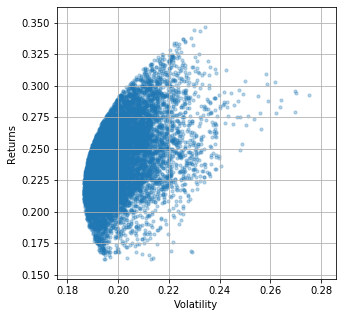

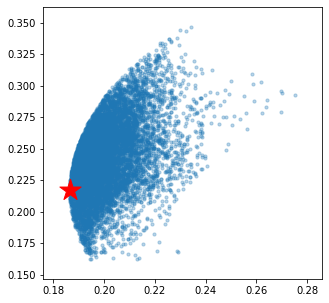

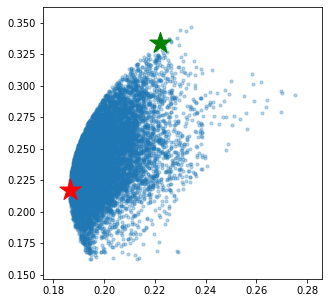

In [ ]:

#Step1:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000


# Loop

for portfolio in range(num_portfolios):

    # get te random numbers for weights
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    # Returns are the product of individual expected returns of the assets and its weights
    returns = np.dot(weights, ind_er)
    p_ret.append(returns)
    
    # Get the volatility
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
    
data ={'Returns': p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter symbol)
    data[symbol+ ' weight'] = [w[counter] for w in p_weights]
    
portfolios = pd.DataFrame(data)
portfolios.head() # DataFrame of the 10000 portfolios created

# Ste2: Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker ='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

# Step3: Plotting the minimum volatility portfolio
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()] # idxmin() gives us the minimum value in the column specified.
min_vol_port

plt.subplots(figsize=[5,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

# Step4: Finding Optimal risky Portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

# Step4: Plotting Optimal Portfolio
plt.subplots(figsize=(5,5))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)


